## Introduction to Deep Learning

### McCulloch-Pitts Neuron

The McCulloch-Pitts neuron model is a simplified model of a biological neuron, introduced by Warren McCulloch and Walter Pitts in 1943. Here's a simple implementation of the McCulloch-Pitts neuron in Python:

In [1]:
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def activate(self, inputs):
        # Check if the sum of weighted inputs is greater than or equal to the threshold
        activation = sum(w * x for w, x in zip(self.weights, inputs)) >= self.threshold

        # Return 1 if activated, else 0
        return 1 if activation else 0

# Example usage:
# Define a McCulloch-Pitts neuron with two inputs, weights, and a threshold
neuron = McCullochPittsNeuron(weights=[0.5, 0.5], threshold=1)

# Test the neuron with different input patterns
input_pattern1 = [1, 0]
input_pattern2 = [1, 1]

output1 = neuron.activate(input_pattern1)
output2 = neuron.activate(input_pattern2)

# Display the results
print(f"Input Pattern 1: {input_pattern1}  |  Output: {output1}")
print(f"Input Pattern 2: {input_pattern2}  |  Output: {output2}")

Input Pattern 1: [1, 0]  |  Output: 0
Input Pattern 2: [1, 1]  |  Output: 1


In the McCulloch-Pitts neuron model, the weights are typically set manually by the designer or researcher. The weights represent the strength of the connections between the inputs and the neuron. Each input is multiplied by its corresponding weight, and the sum of these weighted inputs is compared to a threshold.

Setting the weights involves some trial and error or knowledge of the problem domain. The choice of weights determines the neuron's sensitivity to each input feature. Adjusting the weights allows you to influence how much influence each input has on the neuron's decision.

In more advanced neural network models, such as in modern artificial neural networks, the process of finding the optimal weights is often done through a training process, where the network learns from data. However, the McCulloch-Pitts neuron is a very basic model that predates these more sophisticated approaches and relies on manually specified weights.

In [2]:
## TO-DO Task: Your turn, try to use the McCulloch-Pitts Neuron to model the logic gates 'AND' and 'OR'

### Frank Rosenblatt's Perceptron

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, inputs):
        # Calculate the weighted sum and apply the step function
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels, learning_rate=0.1, epochs=100):
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # Update weights and bias based on the perceptron learning rule
                self.weights += learning_rate * (label - prediction) * inputs
                self.bias += learning_rate * (label - prediction)

In [4]:
# Example usage:
# Suppose you have a dataset with two features (input_size = 2) and corresponding labels.
# You can create a Perceptron object, train it on the dataset, and then use it for predictions.

# Example dataset
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# Create a Perceptron with two input features
perceptron = Perceptron(input_size=2)

# Train the perceptron
perceptron.train(training_inputs, labels)

# Test the trained perceptron
test_input = np.array([1, 0])
prediction = perceptron.predict(test_input)

print(f"The perceptron predicts: {prediction}")

The perceptron predicts: 0


In [ ]:
# Create a perceptron that models the logic gates "AND" and "OR"

### Multi-Layer Perceptron using Scikit-learn

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create an MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"scikit-learn MLP Accuracy: {accuracy}")

scikit-learn MLP Accuracy: 0.8


In [12]:
## Your task, try to edit the MLP architecture!

### Multi-Layer Perceptron using Tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [14]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TensorFlow MLP model
model = Sequential([
    Dense(50, activation='relu', input_shape=(20,)),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate accuracy on the test set
_, accuracy = model.evaluate(X_test, y_test)
print(f"TensorFlow MLP Accuracy: {accuracy}")

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.6561 - accuracy: 0.6100
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.8112
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8413
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8675
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8763
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8850
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8863
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.8888
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8975
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8600
TensorFlow MLP Accura

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                1050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,611
Trainable params: 2,611
Non-trainable params: 0
_________________________________________________________________


### Multi-Layer Perceptron using PyTorch

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from torch.utils.data import TensorDataset, DataLoader

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train, y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
X_test, y_test = torch.FloatTensor(X_test), torch.FloatTensor(y_test)

In [19]:
# Create a PyTorch MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(20, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 30)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(30, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = MLP()

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()

# Evaluate accuracy on the test set
with torch.no_grad():
    predictions = (model(X_test) > 0.5).float()
    accuracy = accuracy_score(y_test.numpy(), predictions.numpy())
    print(f"PyTorch MLP Accuracy: {accuracy}")

PyTorch MLP Accuracy: 0.54


#### Building a Neural Network for MNIST datset (Handwritten digits recognition)

In [29]:
import matplotlib.pyplot as plt

In [21]:
# Importing Dataset
mnist = tf.keras.datasets.mnist.load_data()

In [22]:
# Checking the size/shape of the MNIST dataset
len(mnist), len(mnist[0]), len(mnist[1]), len(mnist[0][0]), len(mnist[0][1]), len(mnist[1][0]), len(mnist[1][1])

(2, 2, 2, 60000, 60000, 10000, 10000)

As we can see the mnist dataset contains two sets of hand-written digits (0 to 9), the first one is the train test which contains 60000 training example with their labels (y_train). On the other hand, the 10000 samples refer to the testing set

In [23]:
(X_train, y_train), (X_test, y_test) = mnist
print("Total training examples: ",len(X_train))
print("Total testing examples: ",len(X_test))

Total training examples:  60000
Total testing examples:  10000


In [24]:
X_train[0].shape

(28, 28)

Each training example in the training set is representing a 28 by 28 matrix, each cell contains a value between 0 and 255 representing the grayscale level for each cell/pixel, 0 for black and 255 for white

In [25]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is number  5


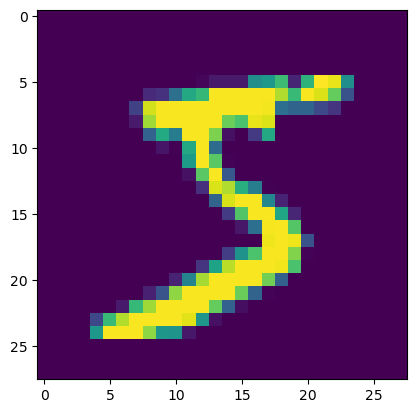

In [30]:
# Let's visualize this as an image
plt.imshow(X_train[0])
print("This is number ", y_train[0])

This is number  9


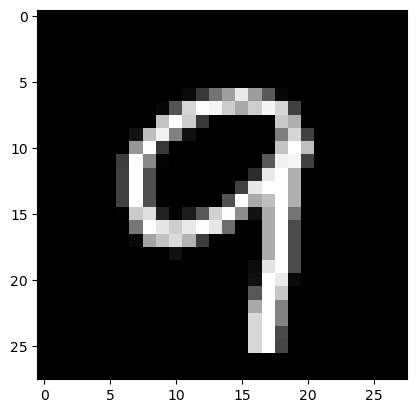

In [31]:
# Another example
plt.imshow(X_train[322], cmap = plt.cm.gray)
print("This is number ", y_train[322])

In [32]:
## Building the ANN model
# At this stage we tend to build a model that can be able to classify digits images
# Let's create and initialize the model 
'''
    A way of creating deep learning models where an instance of the Sequential class is created and 
    model layers are created and added to it
'''
model = tf.keras.models.Sequential()

In [71]:
# We then add the input layer, the hidden layer(s), and the output layer to the initialized model
'''
    As we have seen, each training example is a 28 by 28 matrix, and because we are going to use ANN and not CNN, 
    I am going to reshape the input data as a single array that contains 28*28 = 784 elements
'''
# Adding the input layer
?
# Adding the first hidden layer that contains 256 neurons
?
# Adding the second hidden layer that contains 128 neurons
?
# Adding the output layer that contains 10 output neurons, each of them representing the probability of getting a digit [0-9]
?

In [72]:
# Compiling the model, selecting the optimization algorithm to be used to train the model and the metrics to be tracked
model.compile(
    optimizer = '?',
    loss = '?',
    metrics = '?'
)

Epoch 1/20
1125/1125 [==============================] - 6s 4ms/step - loss: 2.5602 - accuracy: 0.8765 - val_loss: 0.6907 - val_accuracy: 0.9044
Epoch 2/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.3887 - accuracy: 0.9293 - val_loss: 0.3488 - val_accuracy: 0.9278
Epoch 3/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.2221 - accuracy: 0.9487 - val_loss: 0.3657 - val_accuracy: 0.9306
Epoch 4/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1835 - accuracy: 0.9540 - val_loss: 0.2588 - val_accuracy: 0.9468
Epoch 5/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1525 - accuracy: 0.9599 - val_loss: 0.2646 - val_accuracy: 0.9454
Epoch 6/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1328 - accuracy: 0.9642 - val_loss: 0.2590 - val_accuracy: 0.9424
Epoch 7/20
1125/1125 [==============================] - 4s 4ms/step - loss: 0.1296 - accuracy: 0.9656 - val_loss: 0.2223 - val_accuracy:

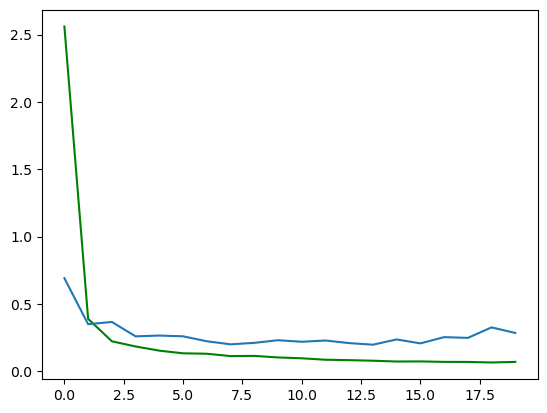

In [73]:
# Fitting the data to the ANN model
history_ = model.fit(X_train, y_train, epochs = 20, validation_split = 0.4)
plt.plot(history_.history['loss'], label = "Training set", color = 'green')
plt.plot(history_.history['val_loss'], label = "Validation set")
plt.show()

In [74]:
predictions = model.?

313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

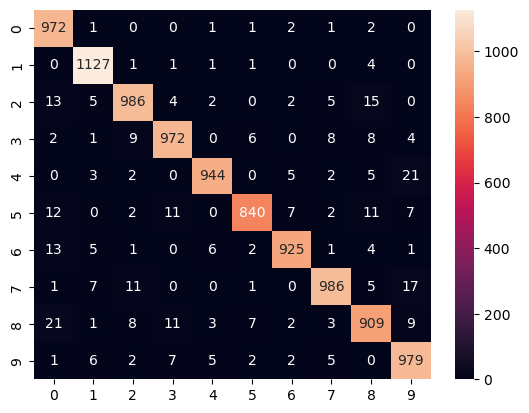

In [75]:
# Let's plot the confusion matrix
predictions = [np.argmax(x) for x in predictions]
sns.?(?(y_test, predictions), annot=True, fmt='g')

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Image Classification using Convolutional Neural Network (CNN)

A neural network with depth( distance form source to sink more than 2 is called deep neural network)

<b>Example: Convolutional Neural Networks</b> Like other types of neural networks, CNNs consume numerical data.

Therefore, the images fed to these networks must be converted to a numerical representation. Since images are made up of pixels, they are converted into a numerical form that is passed to the CNN.

However, as we will discuss in the upcoming section, how different layers work. Figure below shows a CNN architecture.

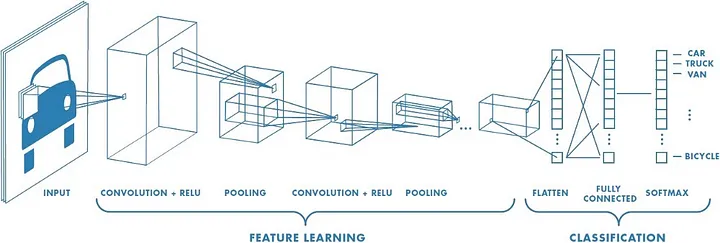

To understand how this works, let’s look at some of the steps involved in training a CNN.

<b>Convolution Layer</b>

Reducing the size of the numerical representation sent to the CNN is done via the convolution operation. This process is vital so that only features that are important in classifying an image are sent to the neural network. Apart from improving the accuracy of the network, this also ensures that minimal compute resources are used in training the network.

The result of the convolution operation is referred to as a feature map, convolved feature, or activation map. Applying a feature detector is what leads to a feature map. The feature detector is also known by other names such as kernel or filter.

The kernel is usually a 3 by 3 matrix. Performing an element-wise multiplication of the kernel with the input image and summing the values, outputs the feature map. This is done by sliding the kernel on the input image. The sliding happens in steps known as strides. The strides and the size of the kernel can be set manually when creating the CNN.

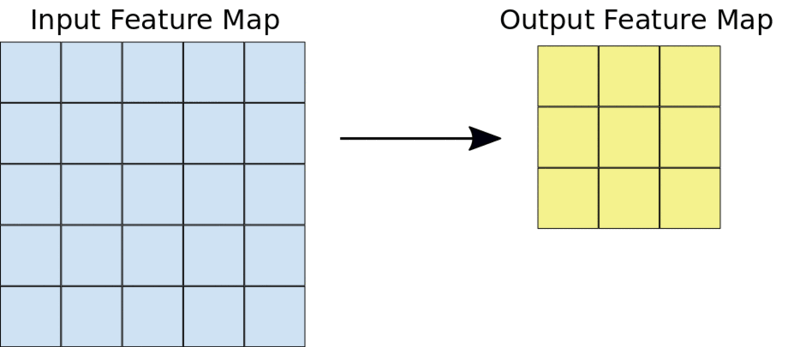

<b>Pooling Layer</b>

In this operation, the size of the feature map is reduced further. There are various pooling methods. A common technique is max-pooling. The size of the pooling filter is usually a 2 by 2 matrix. In max-pooling, the 2 by 2 filter slides over the feature map and picks the largest value in a given box. This operation results in a pooled feature map

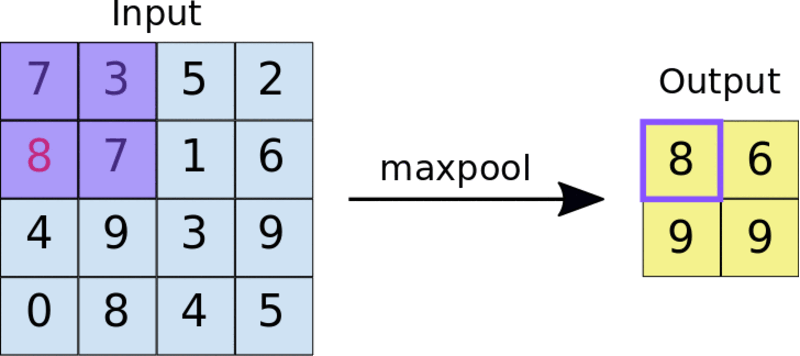

8


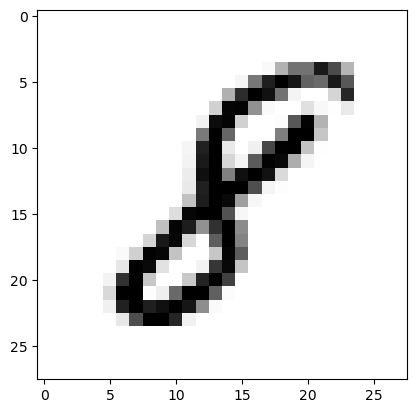

In [33]:
# import train and test mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# When we run the code above, we will get the greyscale visualization of the RGB codes as shown below.

In [34]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [35]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [36]:
# have a look at the summary of model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [37]:
#compile and train the model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2180 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0875 - accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0594 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0450 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0356 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0305 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0260 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0224 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0207 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [38]:
#evaluate the model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0727 - accuracy: 0.9833


[0.07266252487897873, 0.983299970626831]

We achieved 98.5% accuracy with such a basic model. To be frank, in many image classification cases (e.g. for autonomous cars), we cannot even tolerate 0.1% error since, as an analogy, it will cause 1 accident in 1000 cases. However, for our first model, I would say the result is still pretty good. We can also make individual predictions with the following code:

1/1 [==============================] - 0s 95ms/step
9


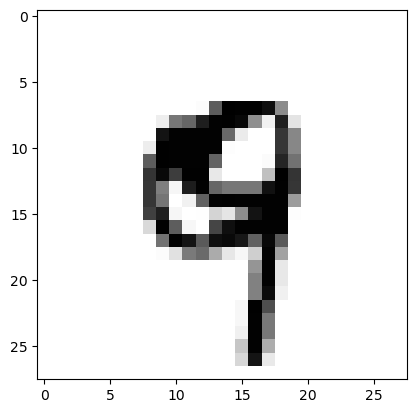

In [39]:
image_index = 4444  
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')   #select the image at given index and show
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # adding batch_size and predicting results
print(pred.argmax())

#### TO-DO Exercise:

<li>Increase the accuracy by adding more convolutional layer(s) in the neural network, change the kernel size, increase training epochs, change batch-size, and change learning rate.</li>

<li>Change the dataset to CIFAR10 and try to increase the accuracy above 78 %.</li>

<li>Create a 1D-CNN and compare the accuracy with 2D-CNN.</li>

<li>Explore the idea of transfer learning. You can find some information here: https://keras.io/guides/transfer_learning/</li>

### Reccurent Neural Network

In [40]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [41]:
# Generate some example sequence data
np.random.seed(42)
seq_length = 10
num_samples = 1000

sequences = np.random.random((num_samples, seq_length, 1))
targets = np.sum(sequences, axis=1)

In [42]:
# Split the data into training and testing sets
split = int(0.8 * num_samples)
train_sequences, test_sequences = sequences[:split], sequences[split:]
train_targets, test_targets = targets[:split], targets[split:]

# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(seq_length, 1)))
model.add(Dense(units=1))

In [45]:
train_sequences.shape

(800, 10, 1)

In [43]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_sequences, train_targets, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(test_sequences, test_targets)
print(f'Test Loss: {loss}')

# Make predictions on new data
new_sequence = np.random.random((1, seq_length, 1))
prediction = model.predict(new_sequence)
print(f'Predicted Sum: {prediction[0][0]}')

Epoch 1/10
20/20 [==============================] - 3s 44ms/step - loss: 12.1070 - val_loss: 1.5898
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 1.0129 - val_loss: 0.7134
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.7282 - val_loss: 0.4050
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6346 - val_loss: 0.3648
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5467 - val_loss: 0.2844
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4286 - val_loss: 0.2309
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.3188 - val_loss: 0.2065
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.2452 - val_loss: 0.1924
Epoch 9/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2091 - val_loss: 0.1198
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1195
Test Loss: 0.11954586207866669
1/1 [==

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
